In [1]:
import os
import pandas as pd
import sys
import datetime
import math
import time
import folium
from vega import VegaLite

In [102]:
start_time = time.time()

dataPath = os.getcwd() + "/data/buste/"


# Create one file by day of analysis
for dirName in os.listdir(dataPath):
    allBusteData = []
    for fileName in os.listdir(dataPath + dirName):
        filePath = dataPath + dirName +  "/" + fileName
        if ("part-" in fileName):
            allBusteData.append(pd.read_csv(filePath))

     # Concatenate all data of one day into one DataFrame
    dataByDay = pd.concat(allBusteData, ignore_index = True)
    print("Day " + dataByDay['gps_datetime'][0].split(" ")[0])

#dataByDay = pd.read_csv(dataPath + "test") # TODO just for test

Day 2017-05-01


In [103]:
dataByDay

route tripNum  shapeId  shapeSequence   shapeLat   shapeLon  \
0         828       1     2941        4248625 -25.492550 -49.296841   
1         828       1     2941        4248629 -25.492562 -49.298461   
2         828       1     2941        4248639 -25.492591 -49.301514   
3         828       1     2941        4248646 -25.492607 -49.304261   
4         828       1     2941        4248649 -25.492615 -49.305682   
5         828       1     2941        4248653 -25.492635 -49.308416   
6         828       1     2941        4248656 -25.492649 -49.310247   
7         828       1     2941        4248659 -25.492670 -49.312632   
8         828       1     2941        4248668 -25.491473 -49.314519   
9         828       1     2941        4248677 -25.489791 -49.316413   
10        828       1     2941        4248693 -25.487556 -49.318793   
11        828       1     2941        4248705 -25.484386 -49.321553   
12        828       1     2941        4248719 -25.482260 -49.323095   
13        828       1     2941        4248739 -25.479853 -49.324089   
14        828       1     2941        4248757 -25.477410 -49.326962   
15        828       1     2941        4248797 -25.476052 -49.331007   
16        828       1     2941        4248813 -25.472709 -49.330879   
17        828       1     2941        4248827 -25.471425 -49.331113   
18        828       1     2941        4248852 -25.468102 -49.331128   
19        828       1     2941        4248863 -25.466816 -49.330295   
20        828       1     2941        4248876 -25.466171 -49.327239   
21        828       1     2941        4248883 -25.464539 -49.326736   
22        828       1     2941        4248906 -25.462806 -49.329039   
23        828       1     2941        4248919 -25.461138 -49.325866   
24        828       1     2941        4248925 -25.460926 -49.328497   
25        828       1     2941        4248943 -25.461944 -49.332257   
26        828       1     2941        4248961 -25.460958 -49.334302   
27        828       1     2941        4248968 -25.460784 -49.336277   
28        828       1     2941        4249004 -25.460141 -49.340811   
29        828       1     2941        4249004 -25.460141 -49.340811   
...       ...     ...      ...            ...        ...        ...   
320549    602       6     2612        5975903 -25.530820 -49.287797   
320550    602       6     2612        5975933 -25.534624 -49.282770   
320551    602       6     2612        5975981 -25.535771 -49.274445   
320552    602       6     2612        5976003 -25.534384 -49.268638   
320553    602       6     2612        5976048 -25.532540 -49.261767   
320554    602       6     2612        5976074 -25.531230 -49.255382   
320555    602       6     2612        5976102 -25.529974 -49.250117   
320556    602       6     2612        5976120 -25.529035 -49.246158   
320557    602       6     2612        5976142 -25.527727 -49.240663   
320558    602       6     2612        5976164 -25.526908 -49.237224   
320559    602       6     2612        5976196 -25.525385 -49.230829   
320560    602       6     2612        5976232 -25.521029 -49.227986   
320561    602       6     2612        5976244 -25.516540 -49.230263   
320562    602       6     2612        5976254 -25.511749 -49.232529   
320563    602       6     2612        5976267 -25.506194 -49.235219   
320564    602       6     2612        5976281 -25.501609 -49.237536   
320565    602       6     2612        5976297 -25.495291 -49.240584   
320566    602       6     2612        5976307 -25.489259 -49.243516   
320567    602       6     2612        5976314 -25.485892 -49.245164   
320568    602       6     2612        5976333 -25.482072 -49.246855   
320569    602       6     2612        5976351 -25.475731 -49.250113   
320570    602       6     2612        5976358 -25.472236 -49.251810   
320571    602       6     2612        5976375 -25.469257 -49.253996   
320572    602       6     2612        5976415 -25.472463 -49.264505   
320573    602       6     2612  

In [104]:
# Remove unusable columns
dataByDay = dataByDay.drop(['shapeSequence', 'distanceTraveledShape', 'gpsPointId', 'distanceToShapePoint', 'stopPointId',
                            'birthdate', 'boarding_id', 'boarding_datetime', 'lineName', 'cardNum', 'gender'], axis = 1)
dataByDay.shape

(320579, 10)

In [105]:
before = dataByDay.shape[0]

# Removing data without gps point and trip with problem (no shape/direction identification)
before = dataByDay.shape[0]

dataByDay = dataByDay[(dataByDay.gpsLat != "-") & (dataByDay.problem != "TRIP_PROBLEM")]
dataByDay = dataByDay.drop(['problem'], axis = 1)

print("After remove rows without GPS: ", dataByDay.shape)
after = dataByDay.shape[0]
deleted_rows = before - after
print("Deleted rows", deleted_rows)

# Fixing index by number of rows
dataByDay = dataByDay.reset_index(drop = True)

dataByDay

('After remove rows without GPS: ', (191614, 9))
('Deleted rows', 128965)


route tripNum  shapeId   shapeLat   shapeLon busCode      gpsLat  \
0         828       1     2941 -25.492550 -49.296841   JA018  -25.492508   
1         828       1     2941 -25.492615 -49.305682   JA018   -25.49257   
2         828       1     2941 -25.492635 -49.308416   JA018  -25.492593   
3         828       1     2941 -25.492649 -49.310247   JA018  -25.492606   
4         828       1     2941 -25.482260 -49.323095   JA018  -25.482318   
5         828       1     2941 -25.477410 -49.326962   JA018  -25.477381   
6         828       1     2941 -25.476052 -49.331007   JA018  -25.476135   
7         828       1     2941 -25.471425 -49.331113   JA018  -25.471366   
8         828       1     2941 -25.466816 -49.330295   JA018  -25.466831   
9         828       1     2941 -25.464539 -49.326736   JA018  -25.464583   
10        828       1     2941 -25.461138 -49.325866   JA018   -25.46109   
11        828       1     2941 -25.461944 -49.332257   JA018  -25.461918   
12        828       1     2941 -25.460784 -49.336277   JA018  -25.460738   
13        828       1     2941 -25.460141 -49.340811   JA018  -25.460095   
14        828       1     2941 -25.460141 -49.340811   JA018  -25.460095   
15        828       1     2941 -25.460141 -49.340811   JA018  -25.460095   
16        828       1     2941 -25.459949 -49.345251   JA018  -25.459923   
17        828       1     2941 -25.458183 -49.346840   JA018  -25.458205   
18        828       1     2941 -25.453828 -49.348991   JA018   -25.45388   
19        828       1     2941 -25.451102 -49.350842   JA018  -25.451216   
20        828       1     2941 -25.449166 -49.351659   JA018  -25.449108   
21        828       1     2941 -25.445569 -49.346421   JA018  -25.445548   
22        828       1     2941 -25.444383 -49.344188   JA018  -25.444488   
23        828       1     2234 -25.447129 -49.348985   JA018  -25.447086   
24        828       1     2234 -25.451429 -49.350783   JA018   -25.45136   
25        828       1     2234 -25.455799 -49.348091   JA018  -25.455696   
26        828       1     2234 -25.457978 -49.347060   JA018  -25.457991   
27        828       1     2234 -25.460206 -49.345165   JA018  -25.460303   
28        828       1     2234 -25.461289 -49.343515   JA018  -25.461326   
29        828       1     2234 -25.461289 -49.343515   JA018  -25.461326   
...       ...     ...      ...        ...        ...     ...         ...   
191584    602       5     2612 -25.472236 -49.251810   GR035  -25.472196   
191585    602       5     2612 -25.469257 -49.253996   GR035   -25.46919   
191586    602       5     2612 -25.472463 -49.264505   GR035  -25.472476   
191587    602       5     2612 -25.473809 -49.269990   GR035  -25.473781   
191588    602       5     2612 -25.474801 -49.274076   GR035  -25.474771   
191589    602       5     2612 -25.476271 -49.280114   GR035  -25.476265   
191590    602       5     2612 -25.477365 -49.285038   GR035  -25.477493   
191591    602       5     2612 -25.476537 -49.292594   GR035  -25.476511   
191592    602       5     2612 -25.512313 -49.295643   GR035   -25.51209   
191593    602       6     2612 -25.530820 -49.287797   GR035  -25.530795   
191594    602       6     2612 -25.535771 -49.274445   GR035  -25.535773   
191595    602       6     2612 -25.531230 -49.255382   GR035  -25.531255   
191596    602       6     2612 -25.529974 -49.250117   GR035  -25.530008   
191597    602       6     2612 -25.526908 -49.237224   GR035  -25.526935   
191598    602       6     2612 -25.525385 -49.230829   GR035  -25.525415   
191599    602       6     2612 -25.516540 -49.230263   GR035  -25.516435   
191600    602       6     2612 -25.511749 -49.232529   GR035  -25.511543   
191601    602       6     2612 -25.506194 -49.235219   GR035  -25.506156   
191602    602       6     2612 -25.489259 -49.243516   GR035  -25.489248   
191603    602       6     2612 -25.485892 -49.245164   GR035  -25.485881   
191604    602       6     2612 -25.482072 -49.246855   G

In [106]:
# Creating new column id to index rows
dataByDay.insert(0, "id", dataByDay.index)

# Creating new column time to group by timestamp and reduce comparisons
dataByDay.insert(1, "time", dataByDay.gps_datetime.str[11:15])

In [107]:
 # Convert timestamp to date
dataByDay['date'] =  dataByDay['gps_datetime'].str.split(" ", n = 1).str[0]
dataByDay['gps_datetime'] =  pd.to_datetime(dataByDay['gps_datetime'])     

In [108]:
# Output dataframe to add Bus Bunching occurrence
outputBusBunching = dataByDay
outputBusBunching['busBunching'] = ""
print(outputBusBunching.shape)

outputBusBunching

(191614, 13)


id  time  route tripNum  shapeId   shapeLat   shapeLon busCode  \
0            0  05:4    828       1     2941 -25.492550 -49.296841   JA018   
1            1  05:4    828       1     2941 -25.492615 -49.305682   JA018   
2            2  05:4    828       1     2941 -25.492635 -49.308416   JA018   
3            3  05:4    828       1     2941 -25.492649 -49.310247   JA018   
4            4  05:4    828       1     2941 -25.482260 -49.323095   JA018   
5            5  05:5    828       1     2941 -25.477410 -49.326962   JA018   
6            6  05:5    828       1     2941 -25.476052 -49.331007   JA018   
7            7  05:5    828       1     2941 -25.471425 -49.331113   JA018   
8            8  05:5    828       1     2941 -25.466816 -49.330295   JA018   
9            9  05:5    828       1     2941 -25.464539 -49.326736   JA018   
10          10  06:0    828       1     2941 -25.461138 -49.325866   JA018   
11          11  06:0    828       1     2941 -25.461944 -49.332257   JA018   
12          12  06:0    828       1     2941 -25.460784 -49.336277   JA018   
13          13  06:0    828       1     2941 -25.460141 -49.340811   JA018   
14          14  06:0    828       1     2941 -25.460141 -49.340811   JA018   
15          15  06:0    828       1     2941 -25.460141 -49.340811   JA018   
16          16  06:0    828       1     2941 -25.459949 -49.345251   JA018   
17          17  06:0    828       1     2941 -25.458183 -49.346840   JA018   
18          18  06:1    828       1     2941 -25.453828 -49.348991   JA018   
19          19  06:1    828       1     2941 -25.451102 -49.350842   JA018   
20          20  06:1    828       1     2941 -25.449166 -49.351659   JA018   
21          21  06:1    828       1     2941 -25.445569 -49.346421   JA018   
22          22  06:1    828       1     2941 -25.444383 -49.344188   JA018   
23          23  06:2    828       1     2234 -25.447129 -49.348985   JA018   
24          24  06:2    828       1     2234 -25.451429 -49.350783   JA018   
25          25  06:2    828       1     2234 -25.455799 -49.348091   JA018   
26          26  06:2    828       1     2234 -25.457978 -49.347060   JA018   
27          27  06:2    828       1     2234 -25.460206 -49.345165   JA018   
28          28  06:2    828       1     2234 -25.461289 -49.343515   JA018   
29          29  06:2    828       1     2234 -25.461289 -49.343515   JA018   
...        ...   ...    ...     ...      ...        ...        ...     ...   
191584  191584  11:4    602       5     2612 -25.472236 -49.251810   GR035   
191585  191585  11:4    602       5     2612 -25.469257 -49.253996   GR035   
191586  191586  11:5    602       5     2612 -25.472463 -49.264505   GR035   
191587  191587  11:5    602       5     2612 -25.473809 -49.269990   GR035   
191588  191588  11:5    602       5     2612 -25.474801 -49.274076   GR035   
191589  191589  11:5    602       5     2612 -25.476271 -49.280114   GR035   
191590  191590  11:5    602       5     2612 -25.477365 -49.285038   GR035   
191591  191591  12:0    602       5     2612 -25.476537 -49.292594   GR035   
191592  191592  12:1    602       5     2612 -25.512313 -49.295643   GR035   
191593  191593  12:2    602       6     2612 -25.530820 -49.287797   GR035   
191594  191594  12:2    602       6     2612 -25.535771 -49.274445   GR035   
191595  191595  12:3    602       6     2612 -25.531230 -49.255382   GR035   
191596  191596  12:3    602       6     2612 -25.529974 -49.250117   GR035   
191597  191597  12:3    602       6     2612 -25.526908 -49.237224   GR035   
191598  191598  12:3    602       6     2612 -25.525385 -49.230829   GR035   
191599  191599  12:4    602       6     2612 -25.516540 -49.230263   GR035   
191600  191600  12:4    602       6     2612 -25.511749 -49.232529   GR035   
191601  191601  12:4    602       6     2612 -25.506194 -49.235219   GR035   
191602  191602  12:5    602       6     2612 -25.489259 -49.243516   GR035   
191603  191603  12:5    602       

In [109]:
def distanceBetween(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_m : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d * 1000 #meters

In [110]:
DISTANCE_THRESHOLD = 100 # meters

def isBusBunching(distance):
    """
    Detecting Bus Bunching.

    Parameters
    ----------
    distance : distance between two gps points
        float

    Returns
    -------
    is_bus_bunching : boolean

    Examples
    --------
    >>> distance = 98.08
    true
    """
    return distance < DISTANCE_THRESHOLD

In [111]:
# Mapping route - buses
route_buses_dic = dataByDay.groupby(['route', 'time', 'shapeId']).apply(lambda f: f[["id", "time", "route", "tripNum", 
                                                                                     "shapeId", "shapeLat", "shapeLon", 
                                                                                     "busCode", "gpsLat", "gpsLon", 
                                                                                     "gps_datetime", 
                                                                                     "date"]].values.tolist()).to_dict()

In [112]:
dataByDay

id  time  route tripNum  shapeId   shapeLat   shapeLon busCode  \
0            0  05:4    828       1     2941 -25.492550 -49.296841   JA018   
1            1  05:4    828       1     2941 -25.492615 -49.305682   JA018   
2            2  05:4    828       1     2941 -25.492635 -49.308416   JA018   
3            3  05:4    828       1     2941 -25.492649 -49.310247   JA018   
4            4  05:4    828       1     2941 -25.482260 -49.323095   JA018   
5            5  05:5    828       1     2941 -25.477410 -49.326962   JA018   
6            6  05:5    828       1     2941 -25.476052 -49.331007   JA018   
7            7  05:5    828       1     2941 -25.471425 -49.331113   JA018   
8            8  05:5    828       1     2941 -25.466816 -49.330295   JA018   
9            9  05:5    828       1     2941 -25.464539 -49.326736   JA018   
10          10  06:0    828       1     2941 -25.461138 -49.325866   JA018   
11          11  06:0    828       1     2941 -25.461944 -49.332257   JA018   
12          12  06:0    828       1     2941 -25.460784 -49.336277   JA018   
13          13  06:0    828       1     2941 -25.460141 -49.340811   JA018   
14          14  06:0    828       1     2941 -25.460141 -49.340811   JA018   
15          15  06:0    828       1     2941 -25.460141 -49.340811   JA018   
16          16  06:0    828       1     2941 -25.459949 -49.345251   JA018   
17          17  06:0    828       1     2941 -25.458183 -49.346840   JA018   
18          18  06:1    828       1     2941 -25.453828 -49.348991   JA018   
19          19  06:1    828       1     2941 -25.451102 -49.350842   JA018   
20          20  06:1    828       1     2941 -25.449166 -49.351659   JA018   
21          21  06:1    828       1     2941 -25.445569 -49.346421   JA018   
22          22  06:1    828       1     2941 -25.444383 -49.344188   JA018   
23          23  06:2    828       1     2234 -25.447129 -49.348985   JA018   
24          24  06:2    828       1     2234 -25.451429 -49.350783   JA018   
25          25  06:2    828       1     2234 -25.455799 -49.348091   JA018   
26          26  06:2    828       1     2234 -25.457978 -49.347060   JA018   
27          27  06:2    828       1     2234 -25.460206 -49.345165   JA018   
28          28  06:2    828       1     2234 -25.461289 -49.343515   JA018   
29          29  06:2    828       1     2234 -25.461289 -49.343515   JA018   
...        ...   ...    ...     ...      ...        ...        ...     ...   
191584  191584  11:4    602       5     2612 -25.472236 -49.251810   GR035   
191585  191585  11:4    602       5     2612 -25.469257 -49.253996   GR035   
191586  191586  11:5    602       5     2612 -25.472463 -49.264505   GR035   
191587  191587  11:5    602       5     2612 -25.473809 -49.269990   GR035   
191588  191588  11:5    602       5     2612 -25.474801 -49.274076   GR035   
191589  191589  11:5    602       5     2612 -25.476271 -49.280114   GR035   
191590  191590  11:5    602       5     2612 -25.477365 -49.285038   GR035   
191591  191591  12:0    602       5     2612 -25.476537 -49.292594   GR035   
191592  191592  12:1    602       5     2612 -25.512313 -49.295643   GR035   
191593  191593  12:2    602       6     2612 -25.530820 -49.287797   GR035   
191594  191594  12:2    602       6     2612 -25.535771 -49.274445   GR035   
191595  191595  12:3    602       6     2612 -25.531230 -49.255382   GR035   
191596  191596  12:3    602       6     2612 -25.529974 -49.250117   GR035   
191597  191597  12:3    602       6     2612 -25.526908 -49.237224   GR035   
191598  191598  12:3    602       6     2612 -25.525385 -49.230829   GR035   
191599  191599  12:4    602       6     2612 -25.516540 -49.230263   GR035   
191600  191600  12:4    602       6     2612 -25.511749 -49.232529   GR035   
191601  191601  12:4    602       6     2612 -25.506194 -49.235219   GR035   
191602  191602  12:5    602       6     2612 -25.489259 -49.243516   GR035   
191603  191603  12:5    602       

In [113]:
INTERVAL_TIME_THRESHOLD = 5 # minimal difference in minutes to consider BB

for row in dataByDay.itertuples():
    """
    Index=0, id=0, time='05:4', route=463, tripNum=1, shapeId=2846, shapeLat=-25.478024708433903, 
    shapeLon=-49.203032595858183, busCode='DC090', gpsLat='-25.477931', gpsLon='-49.203043', 
    gps_datetime=Timestamp('2017-04-30 05:48:27'), date='2017-04-30', busBunching=''
    """

    indexFirstBus = row[1]
    timeFirstBus = row[2]
    routeFirstBus = row[3]
    shapeIdFirstBus = row[5]
    latitudeFirstBus = row[6]
    longitudeFirstBus = row[7]
    codeFirstBus = row[8]
    timestampFirstBus = row[11]

    closestTime = ""
    previousBus = ""

    # Compare buses from the same route and shape id (avoiding buses in opposite trips, e.g.)
    # and in time range (avoiding buses in different hours, e.g.)
    buses_same_route = route_buses_dic[routeFirstBus, timeFirstBus, shapeIdFirstBus]

    for rowOtherBus in buses_same_route:
        """
        [0, '05:4', 463, 1, 2846, -25.478024708433903, -49.20303259585818, 'DC090', '-25.477931', '-49.203043', 
        Timestamp('2017-04-30 05:48:27'), '2017-04-30']
        """

        indexOtherBus = rowOtherBus[0]
        routeOtherBus = rowOtherBus[2]
        codeOtherBus = rowOtherBus[7]
        timestampOtherBus = rowOtherBus[10]
        latitudeOtherBus = rowOtherBus[5]
        longitudeOtherBus = rowOtherBus[6]


        if (codeOtherBus != codeFirstBus): # avoiding to compare with the same bus
            difTime = abs(timestampOtherBus - timestampFirstBus)

            if (previousBus == codeOtherBus):

                #find the nearest timestamps

                if (difTime < closestTime):
                    closestTime = difTime
                    closestBusCode = codeOtherBus
                    closestLat = latitudeOtherBus
                    closestLon = longitudeOtherBus
                    closestID = indexOtherBus

            else:
                #first, analyse the last bus

                if (closestTime != "" and (closestTime < datetime.timedelta(seconds = INTERVAL_TIME_THRESHOLD))):
                    distance = distanceBetween((float(latitudeFirstBus), float(longitudeFirstBus)), 
                                               (float(closestLat), float(closestLon)))

                    if (isBusBunching(distance)):
                        bbFirstBus = outputBusBunching.iloc[indexFirstBus]["busBunching"]
                        if (str(closestID) not in bbFirstBus):
                            
                            if (str(indexFirstBus) not in bbFirstBus):
                                outputBusBunching.loc[indexFirstBus,'busBunching'] = str(indexFirstBus) + "-" + str(closestID) + "-"
                            else:
                                outputBusBunching.loc[indexFirstBus,'busBunching'] = bbFirstBus + str(closestID) + "-"

                        bbClosestBus = outputBusBunching.iloc[closestID]["busBunching"]
                        if (str(indexFirstBus) not in bbClosestBus):
                            
                            if (str(closestID) not in bbClosestBus):
                                outputBusBunching.loc[closestID,'busBunching'] = str(indexFirstBus) + "-" + str(closestID) + "-"
                            else:
                                outputBusBunching.loc[closestID,'busBunching'] = bbClosestBus + str(indexFirstBus) + "-"

                # -----------------------------------------
                # New bus to compare: reseting variables
                previousBus = codeOtherBus
                closestTime = difTime
                closestBusCode = codeOtherBus
                closestLat = latitudeOtherBus
                closestLon = longitudeOtherBus
                closestID = indexOtherBus

In [114]:
outputBusBunching[outputBusBunching['busBunching'] != ""]

id  time  route tripNum  shapeId   shapeLat   shapeLon busCode  \
39349    39349  16:3    203       6     3856 -25.385025 -49.232681   GD350   
177865  177865  16:3    203       6     3856 -25.385025 -49.232681   BE703   

            gpsLat      gpsLon        gps_datetime        date    busBunching  
39349    -25.38486   -49.23251 2017-05-01 16:39:41  2017-05-01  177865-39349-  
177865  -25.384858  -49.232545 2017-05-01 16:39:45  2017-05-01  177865-39349-

In [115]:
executionTime = int(time.time() - start_time) / 60
print("--- %s minutes ---" % executionTime)

--- 3 minutes ---


In [116]:
# Saving csv file

dayOfAnalysis = "2017-05-01"
outputPath = os.getcwd() + "/data/outputBusBunching/outputBusBunching-" + dayOfAnalysis

outputBusBunching.to_csv(outputPath + ".csv", index_label = "index", encoding = 'utf-8')

## Validation

In [18]:
# grouping by busBunching to show buses bunching and validate them

dayOfAnalysis = "allData.csv"
filePath = os.getcwd() + "/data/outputBusBunching/outputBusBunching-" + dayOfAnalysis
busBunching = pd.read_csv(filePath)


In [31]:
outputBB_day = busBunching[(busBunching.route == 60) & (busBunching.busBunching.notnull())]
#buses = outputBB_day.busCode.unique()

outputGrouped = outputBB_day.groupby('busBunching')
len(outputGrouped)

2537

In [29]:
list(outputGrouped)[0:10]

[('339125-362023-',
             index  index.1      id  time route  tripNum  shapeId   shapeLat  \
  3290813  3290813   339125  339125  19:2    60        4     1721 -25.521417   
  3313711  3313711   362023  362023  19:2    60        8     1721 -25.521417   
  
            shapeLon busCode     gpsLat     gpsLon         gps_datetime  \
  3290813 -49.292792   HR120 -25.521480 -49.292611  2017-05-12 19:26:13   
  3313711 -49.292792   HB602 -25.521563 -49.292440  2017-05-12 19:26:11   
  
                 date     busBunching  
  3290813  2017-05-12  339125-362023-  
  3313711  2017-05-12  339125-362023-  )]

In [33]:
# Validating bus bunching at map

# create dic route - color
colors = ["orange", "blue", "brown", "pink", "black", "red", "green", "purple", "grey", "yellow", "magenta", "white"]

# Make an empty map
m = folium.Map(tiles = "OpenStreetMap", zoom_start = 13, location = [-25.428777,-49.249120])

# I can add marker one by one on the map
count = 0
for table, group in list(outputGrouped)[0:10]:
    count += 1

    for row, busData in group.iterrows():
        route = busData.route
        busCode = busData.busCode
        bb = busData.busBunching
        gpsLat = busData.gpsLat
        gpsLon = busData.gpsLon
        timestamp = busData.gps_datetime

        popup_data = "route: " + str(route) + " Bus Code: " + str(busCode) + " Timestamp: " + str(timestamp)
        colorName = colors[count]

        folium.CircleMarker([gpsLat, gpsLon], popup = popup_data, radius = 10, color = colorName, 
                            fill_opacity = 0.3, fill_color = colorName).add_to(m)

# Save it as html
# m.save('bus_bunching_visualization.html')
m

In [34]:
m.save('gps_visualization-test.html')

In [24]:
outputBusBunching[(outputBusBunching.busCode == 'BD146') & (outputBusBunching.busBunching != "")] #BD142 17h

id  time  route tripNum  shapeId   shapeLat   shapeLon busCode  \
26046  26046  08:4    203       2     3855 -25.491796 -49.293519   BD146   
26179  26179  13:2    203       5     3856 -25.377255 -49.223935   BD146   
26230  26230  15:1    203       5     3855 -25.376980 -49.224466   BD146   
26256  26256  16:1    203       6     3855 -25.491796 -49.293519   BD146   
26280  26280  17:0    203       6     3855 -25.395629 -49.242489   BD146   
26285  26285  17:1    203       6     3855 -25.376980 -49.224466   BD146   
26286  26286  17:1    203       7     3856 -25.380861 -49.228867   BD146   
26419  26419  21:5    203       9     3856 -25.487755 -49.294288   BD146   

           gpsLat      gpsLon        gps_datetime        date    busBunching  
26046  -25.491731  -49.293503 2017-05-01 08:40:12  2017-05-01  26046-141595-  
26179  -25.377418  -49.224581 2017-05-01 13:27:06  2017-05-01   57308-26179-  
26230   -25.37698  -49.224428 2017-05-01 15:15:49  2017-05-01   26230-57363-  
26256  -25.491735  -49.293501 2017-05-01 16:16:14  2017-05-01   57389-26256-  
26280  -25.395485   -49.24238 2017-05-01 17:01:46  2017-05-01   57415-26280-  
26285  -25.376956  -49.224881 2017-05-01 17:10:53  2017-05-01  141849-26285-  
26286  -25.380901  -49.228938 2017-05-01 17:17:58  2017-05-01   57423-26286-  
26419  -25.487831  -49.294295 2017-05-01 21:57:49  2017-05-01   26419-57562-

### BULMA

In [59]:
filePath = "D:/Desktop/UFCG/Projeto INES/bkp/2017_05_02_veiculos-BULMA/part-00005"
outputBULMA = pd.read_csv(filePath)

outputBULMAperRoute = outputBULMA[(outputBULMA.route == 203) & (outputBULMA.busCode == 'BE703')]#GD350 

outputBULMAperRoute.to_csv('D:/Desktop/UFCG/Projeto INES/bkp/2017_05_02_veiculos-BULMA/' + "bulma2-BE703" + ".csv", index_label = "index", encoding = 'utf-8')

### BUSTE

In [74]:
filePath = "D:/Desktop/UFCG/Projeto INES/bkp/2017_05_01-BUSTE/part-00002"
outputBUSTE = pd.read_csv(filePath)

outputBUSTEperRoute = outputBUSTE[(outputBUSTE.route == 611) & (outputBUSTE.busCode == 'JA001')]#JA001

outputBUSTEperRoute.to_csv('D:/Desktop/UFCG/Projeto INES/bkp/2017_05_01-BUSTE/' + "buste-JA001" + ".csv", index_label = "index", encoding = 'utf-8')

In [54]:
outputBUSTE[(outputBUSTE.route == 203)& (outputBUSTE.busCode == 'BD142')]

route tripNum  shapeId  shapeSequence   shapeLat   shapeLon  \
26696    203       1     3856        4649665 -25.380861 -49.228867   
26697    203       1     3856        4649677 -25.385025 -49.232681   
26698    203       1     3856        4649686 -25.388657 -49.236040   
26699    203       1     3856        4649699 -25.393439 -49.240486   
26700    203       1     3856        4649706 -25.396547 -49.243343   
26701    203       1     3856        4649717 -25.399622 -49.246208   
26702    203       1     3856        4649730 -25.403603 -49.249889   
26703    203       1     3856        4649742 -25.406358 -49.252658   
26704    203       1     3856        4649758 -25.410129 -49.255915   
26705    203       1     3856        4649770 -25.413248 -49.258801   
26706    203       1     3856        4649784 -25.416123 -49.261476   
26707    203       1     3856        4649801 -25.419991 -49.265103   
26708    203       1     3856        4649825 -25.423967 -49.268418   
26709    203       1     3856        4649861 -25.429998 -49.267586   
26710    203       1     3856        4649898 -25.437689 -49.266858   
26711    203       1     3856        4649908 -25.439440 -49.271367   
26712    203       1     3856        4649924 -25.441569 -49.276919   
26713    203       1     3856        4649937 -25.443397 -49.281657   
26714    203       1     3856        4649947 -25.444797 -49.285342   
26715    203       1     3856        4649973 -25.448284 -49.287834   
26716    203       1     3856        4649989 -25.452397 -49.287870   
26717    203       1     3856        4650016 -25.456935 -49.288598   
26718    203       1     3856        4650033 -25.461170 -49.289849   
26719    203       1     3856        4650050 -25.464585 -49.291270   
26720    203       1     3856        4650067 -25.467684 -49.293215   
26721    203       1     3856        4650103 -25.472589 -49.294436   
26722    203       1     3856        4650129 -25.476471 -49.292645   
26723    203       1     3856        4650158 -25.481041 -49.292575   
26724    203       1     3856        4650176 -25.484338 -49.293722   
26725    203       1     3856        4650198 -25.487755 -49.294288   
...      ...     ...      ...            ...        ...        ...   
27109    203       7     3855        4649120 -25.487704 -49.294297   
27110    203       7     3855        4649137 -25.484497 -49.293782   
27111    203       7     3855        4649154 -25.480983 -49.292569   
27112    203       7     3855        4649184 -25.476393 -49.292584   
27113    203       7     3855        4649211 -25.472606 -49.294435   
27114    203       7     3855        4649239 -25.467642 -49.293181   
27115    203       7     3855        4649258 -25.464631 -49.291288   
27116    203       7     3855        4649278 -25.461164 -49.289847   
27117    203       7     3855        4649300 -25.456936 -49.288600   
27118    203       7     3855        4649329 -25.452328 -49.287880   
27119    203       7     3855        4649347 -25.448370 -49.287847   
27120    203       7     3855        4649376 -25.444865 -49.285512   
27121    203       7     3855        4649392 -25.442971 -49.280557   
27122    203       7     3855        4649408 -25.441164 -49.275879   
27123    203       7     3855        4649419 -25.439073 -49.270440   
27124    203       7     3855        4649426 -25.437639 -49.266701   
27125    203       7     3855        4649460 -25.430066 -49.267559   
27126    203       7     3855        4649495 -25.423926 -49.268460   
27127    203       7     3855        4649515 -25.418688 -49.263872   
27128    203       7     3855        4649528 -25.415194 -49.260634   
27129    203       7     3855        4649537 -25.412340 -49.257964   
27130    203       7     3855        4649549 -25.409292 -49.255146   
27131    203       7     3855        4649562 -25.406645 -49.252787   
27132    203       7     3855        4649576 -25.402547 -49.248908   
27133    203       7     3855        4649588 -25.398841 -49.245493   
27134    203     

## Analysis (Day: 2017-05-01)

### Por rota

Total de rotas: 202

**Com aglomerados: 8 (4%)**

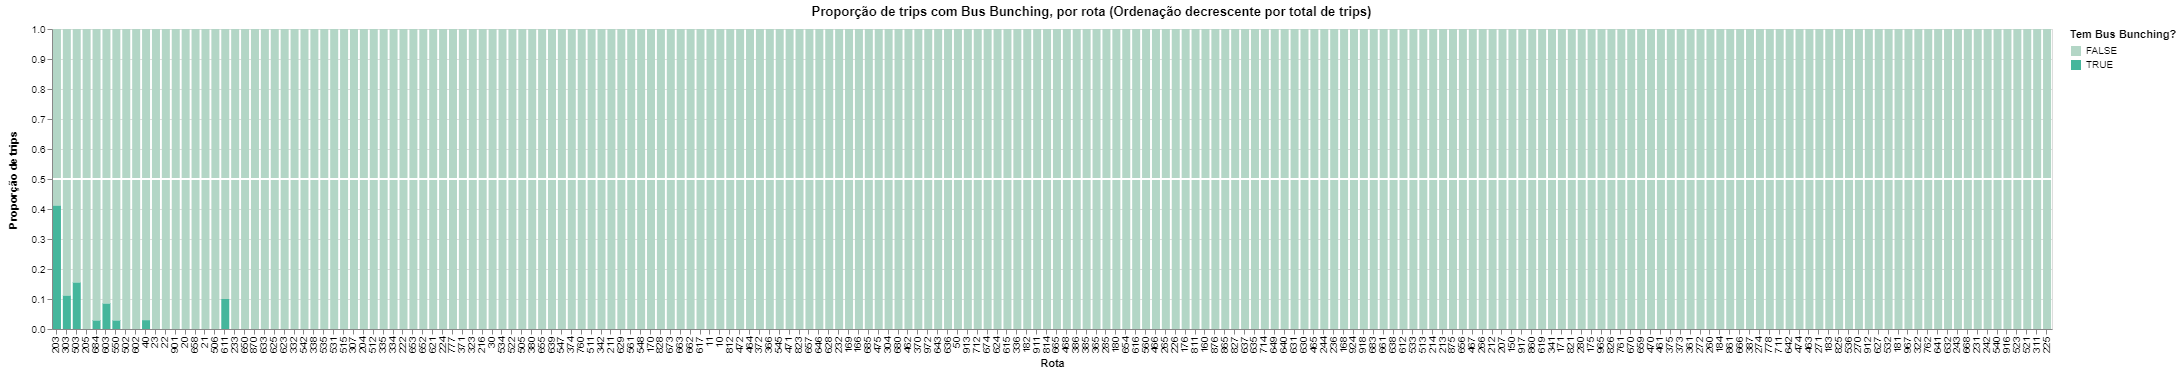

In [62]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "width": 2000,
  "height": 300,
  "title": {
    "text": "Proporção de trips com Bus Bunching, por rota (Ordenação decrescente por total de trips)"
  },
  "data": {
    "url": "https://gist.githubusercontent.com/veruskasantos/65e3b265d6ad8a4ca59427c8d2d9da34/raw/151e86d7a5055cb6c9e4d89f814402348a67ed80/bb_per_route_curitiba-2017-05-01.csv"
  },
  "transform": [
    {
      "calculate": "0.5",
      "as": "ref"
    }
  ],
  "layer": [
    {
      "mark": {
        "type": "bar",
        "size": 8
      },
      "encoding": {
        "x": {
          "field": "route",
          "type": "nominal",
          "axis": {
            "title": "Rota"
          },
          "sort": {
            "op": "sum",
            "field": "trips",
            "order": "descending"
          }
        },
        "color": {
          "field": "hasBusBunching",
          "type": "nominal","legend": {"title": "Tem Bus Bunching?"},
          "scale": {
            "range": [
              "#B3D6C6",
              "#45B69C"
            ]
          }
        },
        
        "y": {
          "field": "percTrips",
          "type": "quantitative",
          "stack": "normalize",
          "axis": {
            "title": "Proporção de trips"
          }
        },
        "tooltip": [
          {
            "field": "date",
            "type": "ordinal",
            "title": "Date"
          },
          {
            "field": "route",
            "type": "nominal",
            "title": "Route"
          },
          {
            "field": "hasBusBunching",
            "type": "nominal",
            "title": "Has BB?"
          },
          {
            "field": "trips",
            "type": "quantitative",
            "title": "Total trips"
          },
          {
            "field": "percTrips",
            "type": "quantitative",
            "title": "Trips %"
          }
        ]
      }
    },
    {
      "mark": "rule",
      "encoding": {
        "y": {
          "field": "ref",
          "type": "quantitative"
        },
        "color": {
          "value": "white"
        },
        "size": {
          "value": 2
        }
      }
    }
  ]
})

### Por ônibus

Total de ônibus: 411

**Com aglomerados: 34 (8%)**

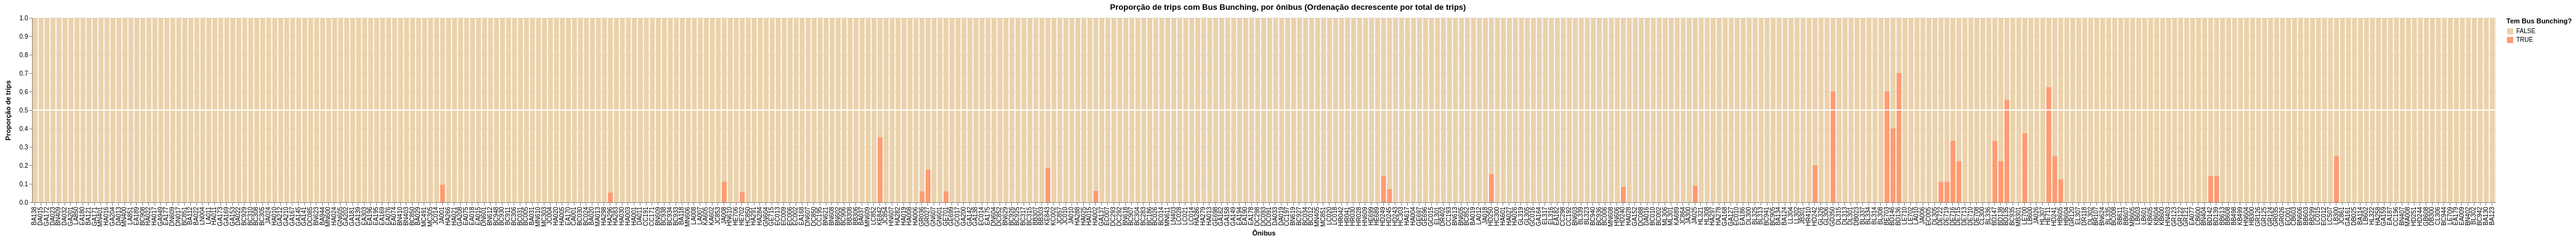

In [14]:
VegaLite(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "width": 4000,
  "height": 300,
  "title": {
    "text": "Proporção de trips com Bus Bunching, por ônibus (Ordenação decrescente por total de trips)"
  },
  "data": {
    "url": "https://gist.githubusercontent.com/veruskasantos/ed5136145c14c17e427243ae2925e62c/raw/7d5996317db78450dd7073223d17284fe68209ef/bb_per_bus_curitiba-2017-05-01.csv"
  },
  "transform": [
    {
      "calculate": "0.5",
      "as": "ref"
    }
  ],
  "layer": [
    {
      "mark": {
        "type": "bar",
        "size": 8
      },
      "encoding": {
        "x": {
          "field": "busCode",
          "type": "nominal",
          "axis": {
            "title": "Ônibus"
          },
          "sort": {
            "op": "sum",
            "field": "trips",
            "order": "descending"
          }
        },
        "color": {
          "field": "hasBusBunching",
          "type": "nominal",
          "legend": {
            "title": "Tem Bus Bunching?"
          },
          "scale": {
            "range": [
              "#EAD2AC",
              "#FF9B71"
            ]
          }
        },
        "y": {
          "field": "percTrips",
          "type": "quantitative",
          "stack": "normalize",
          "axis": {
            "title": "Proporção de trips"
          }
        },
        "tooltip": [
          {
            "field": "date",
            "type": "ordinal",
            "title": "Date"
          },
          {
            "field": "busCode",
            "type": "nominal",
            "title": "Bus Code"
          },
          {
            "field": "hasBusBunching",
            "type": "nominal",
            "title": "Has BB?"
          },
          {
            "field": "trips",
            "type": "quantitative",
            "title": "Total trips"
          },
          {
            "field": "percTrips",
            "type": "quantitative",
            "title": "Trips %"
          }
        ]
      }
    },
    {
      "mark": "rule",
      "encoding": {
        "y": {
          "field": "ref",
          "type": "quantitative"
        },
        "color": {
          "value": "white"
        },
        "size": {
          "value": 2
        }
      }
    }
  ]
})

### Por rota e horário

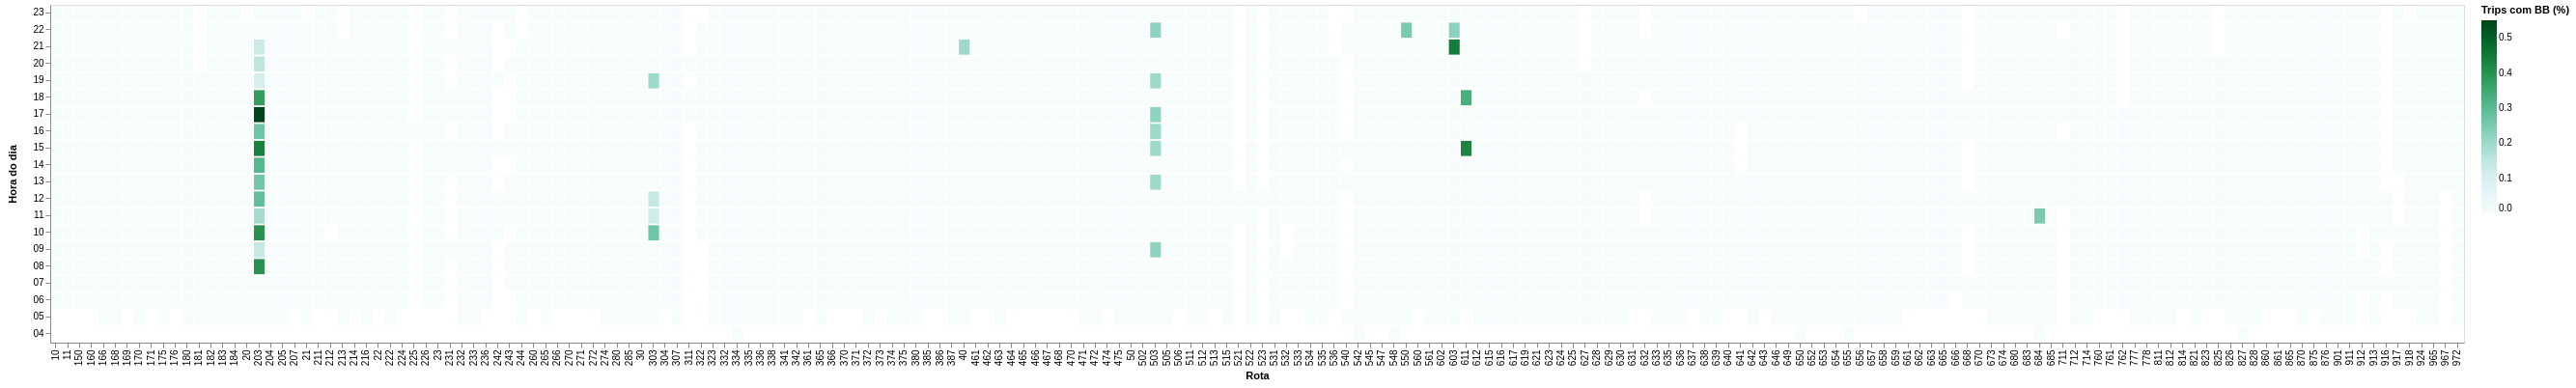

In [28]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "width": 2500,
  "height": 350,
  "data": {"url": "https://gist.githubusercontent.com/veruskasantos/490655fcab74f0f7830f8081f65b6777/raw/18baf819a2b0087320132776255de232bdd73a40/bb_per_route_hour_curitiba-2017-05-01.csv"},
  "mark": {"type": "rect"},
  "encoding": {
    "y": {"field": "time", "type": "ordinal", "title": "Hora do dia", "sort":"descending"},
    "tooltip": [
          {
            "field": "date",
            "type": "ordinal",
            "title": "Date"
          },
        {
            "field": "time",
            "type": "ordinal",
            "title": "Hora"
          },
          {
            "field": "trips",
            "type": "quantitative",
            "title": "Total trips with BB"
          },
          {
            "field": "percTripsWithBB",
            "type": "quantitative",
            "title": "Trips with BB %"
          }
        ],
    "x": {"field": "route", "type": "nominal", "title": "Rota"},
    "color": {"field": "percTripsWithBB", "type": "quantitative", "legend": {"title": "Trips com BB (%)"}, "scale": {
              "scheme": "bluegreen"
            }}
  }
})

### Por hora do dia

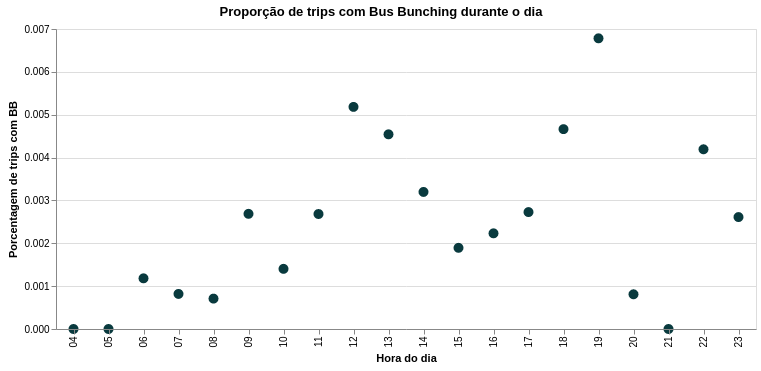

In [42]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "width": 700,
  "height": 300,
  "title": "Proporção de trips com Bus Bunching durante o dia",
  "data": {
    "url": "https://gist.githubusercontent.com/veruskasantos/490655fcab74f0f7830f8081f65b6777/raw/24eb7fbc883aa121ee7e3e209c877fb63b67ae4f/bb_per_route_hour_curitiba.csv"
  },
  "mark": {
    "type": "point",
    "filled": True,
    "size": 100
  },
  "encoding": {
    "x": {
      "field": "time",
      "type": "ordinal",
      "title": "Hora do dia"
    },
    "y": {
      "field": "percTripsWithBB",
      "aggregate": "mean",
      "type": "quantitative",
      "title": "Porcentagem de trips com BB",
      "sort": "ascending"
    },
    "tooltip": [
      {
        "field": "time",
        "type": "ordinal",
        "title": "Hora"
      },
      {
        "field": "percTripsWithBB",
        "type": "quantitative",
        "aggregate": "mean",
        "title": "Trips with BB %"
      }
    ],
    "color": {
      "value": "#093A3E"
    }
  }
})